In [ ]:
# Keras is a Deep Learning library. Everything we need is defined here. We will use them according to our need!

# Sequential API to create Models
from keras.models import Sequential

# Components to create a Model
from keras.layers import Dense, Input

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# A Keras utility to binarize integers
from keras.utils import to_categorical

# A Keras utility to visualize Model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow # To display images

# Another Python library for plotting things
import matplotlib.pyplot as plt

# Another Python library to manipulate vectors, metrices, arrays etc.
import numpy as np

<font size = 6><font color = red> Hyper-<font color = yellow>Parameters

In [ ]:
# Hyperparameters are those parameters which we can choose or select by our choice!

# whole dataset splits into batches
batch_size = 128 # Each batch will have 128 samples each!

# Number of labels of our dataset
nb_classes = 10 # MNIST dataset has values between 0 to 9. So, 10 classes or labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Number of times we want to train the Model
nb_epoch = 10 # epoch ---> how many times we want to Train our Model before Testing!

<font size = 6><font color = lime> Load Data

In [ ]:
# Load MNIST dataset
# Data split into two sub-set: Traing and Test
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Input or Feature is X_train and it's associated label is y_train. Same also for test dataset.
# We didn't define any value for splitting. It is done by default.

<font size = 6><font color = red> Data Statistics

In [ ]:
print("Number of Training Samples : ", len(X_train))
print("Number of Associated Labels : ", len(y_train))

Number of Training Samples :  60000
Number of Associated Labels :  60000


In [ ]:
print("Shape of Training Data : ", X_train.shape) # These image data are stored as numpy array. We can consider it as a matrix.
                                                  # (60000, 28, 28) means 60000 samples of data with 28 * 28 dimension or 28 height and 28 width.

Shape of Training Data :  (60000, 28, 28)


In [ ]:
print("Data type of Training samples : ", X_train.dtype) # uint8 ---> unsigned integer. Means values are intergers and range is between 0 to 255.

Data type of Training samples :  uint8


In [ ]:
print("Number of Test Samples : ", len(X_test))
print("Number of Associated Labels : ", len(y_test))

Number of Test Samples :  10000
Number of Associated Labels :  10000


In [ ]:
print("Shape of Training Labels : ", y_train.shape) # (60000,) ---> because our label is a single integer! That's why only 1 value. [0 or 2 or 9 etc. etc.]

Shape of Training Labels :  (60000,)


In [ ]:
print("Shape of Test Data : ", X_test.shape) # Same like shape of train data.

Shape of Training Data :  (10000, 28, 28)


In [ ]:
print("Data type of Test samples : ", X_test.dtype) # unsigned integer is represented by "uint8"

Data type of Training samples :  uint8


In [ ]:
print("Shape of Test Labels : ", y_test.shape) # Same as shape of training labels. Can be imagined as a 1D vector.

Shape of Test Labels :  (10000,)


<font size = 6><font color = lime> Visualize Data

In [ ]:
# A single sample among 60,000 samples
X_train[0].shape

(28, 28)

In [ ]:
a_random_sample = X_train[0]

# Pixel values of the sample
a_random_sample              # We can see our random_sample is an array. And the values shown in the array are the pixel values. All these pixel values are integers. And range between 0 to 255.
                             # Note : At present in the updated colab, image is directly shown. To see the pixel values, click on the "show data" button on output.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

/tmp/ipython-input-4084086330.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_image)


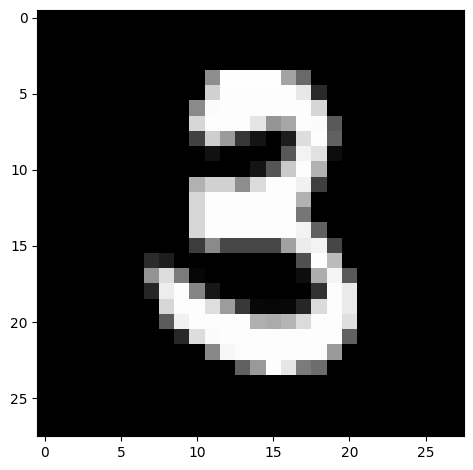

In [ ]:
# Get a random sample
random_image = X_train[56321]

# Display it
imshow(random_image)

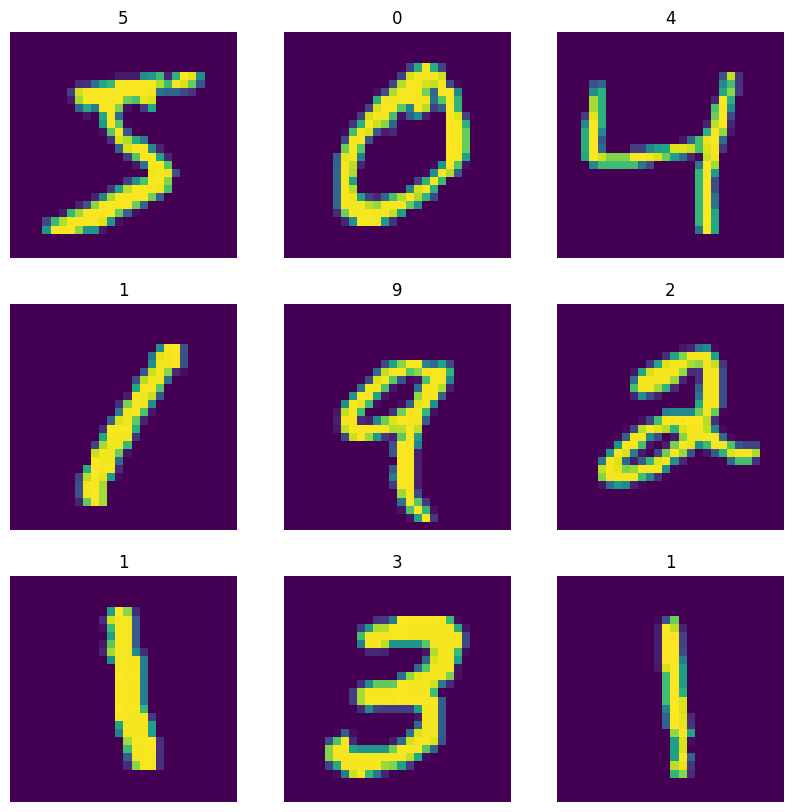

In [ ]:
# To plot multiple images ---

# Define the size of the figure
plt.figure(figsize=(10,10))

for i in range(9):
  ax = plt.subplot(3, 3, i+1)

  # Get a sample at index i
  an_image = X_train[i]

  # Display the sample
  plt.imshow(an_image)

  # Display the label of the sample as title
  plt.title(int(y_train[i]))

  plt.axis("off")

<font size = 6><font color = red> Reshape and Flatten Data(From 3D <font color = cyan>[60000,28,28] <font color = red> to 1D)

<font size = 4><font color = yellow> We want to implement Fully Connected Neural Network. If we oserved then we can see in FCNN Architecture, There are so many Neurons after the Input layer. Every Input is passed through every Neurons. After that there are Hidden layers and the the Output layer.<font color = lime> But in FCNN, a single Neuron can only take a single Input. A Neuron can not take/accept a Matrix (of input) altogether. Means can not take Input in forms of a Matrix. For example, FCNN can not take a matrix of 2 * 3 size/dimension. <font color = blue> What we are trying to say is that our dataset has image data and their size is 28 * 28. So, we can not fit these images into our (FCNN) neural network. Because in the Structure/Architecture of our FCNN, 1 Neuron can receive only 1 Input. Means it can only take 1D (one dimensional) Input.<font color = orange> In our sample, image data size 28 * 28 means they are divided into grid(pixel). 28 grid(pixel) alongside height and 28 grid(pixel) alongside width. Every grid has a value. Our FCNN can not take this (Input) image as a whole. So, we have to send these grid values to each single (one) Neuron. Means, in our FCNN, 1 Neuron can receive/accept 1 pixel value at a time. How many number of Neurons we need to take in the Input layer? The Number of pixel value we have in our every sample data. That means we need to take 28 * 28 = 784 Neurons in our Input layer.<font color = chrome red> Now we can see that our input data (images) are in 2D (28 * 28).We can not FIT this in our Network in 2D. So, Now to take this as Input we need to CONVERT it into 1D. We are calling the Conversion from 2D to 1D is RESHAPE.<font color = violet> And converting 3D or 2D data to 1D is called Flatten(ing). We saw our image data's shape in X_train or in our Training data was (60000, 28, 28). Now we need to Flat this 3D data to 1D. Means we will do the Flatten Data operation.

In [ ]:
print("Shape of Training Data : ", X_train.shape)

print("Shape of a Training Sample : ", X_train[0].shape)

Shape of Training Data :  (60000, 28, 28)
Shape of a Training Sample :  (28, 28)


In [ ]:
# Get a sample image
an_image = X_train[0]

print("Shape of a Sample image : ", an_image.shape)

# Define new Shape and Flatten the image
new_shape = 28*28   # 28*28 = 784. new_shape = 784.

flattend_an_image = an_image.reshape(new_shape,) # reshape is a function of numpy library. Because we have only 1 image we didn't need to mension the image numbers.
print("Shape of the Flattend image : ", flattend_an_image.shape)


Shape of a Sample image :  (28, 28)
Shape of the Flattend image :  (784,)


<font size = 5><font color = lime> We have Flatten only 1 image data. But our dataset has 60000 samples of image data! Now we need to Flatten all of these 60000 images. Now let's see how we can do this!

In [ ]:
print("Previous Shape of X_train : ", X_train.shape)

# Flatten the whole Training Data
X_train = X_train.reshape(60000, 784) # in reshape function pass the number of image (samples), here it is 60000. Then the reshape value, here it is 784.
                                      # After performing reshape operation, the the X_train data are not in image(2D) form. Now they are in 1D form (for now).
print("New Shape of X_train : ", X_train.shape) # In reality, when we Flatten a 2D image to 1D then it is no longer an image. It becomes a 1D Tensor.

Previous Shape of X_train :  (60000, 28, 28)
New Shape of X_train :  (60000, 784)


<font size = 5><font color = lime> Now, We have to do the same work for Test data. Flatten the Test data! For testing the Model with same type of data it was Trained on.

In [ ]:
print("Previous Shape of X_test : ", X_test.shape)

# Flatten the whole Test Data
X_test = X_test.reshape(10000, 784)

print("New Shape of X_test : ", X_test.shape)

Previous Shape of X_test :  (10000, 28, 28)
New Shape of X_test :  (10000, 784)


<font size = 5><font color = lime> In the future, we will do a operation called Rescale. For doing rescale, we need to change the data type. We need to convert it into float data type for rescaling data!

In [ ]:
print("Previous Data type of Training samples : ", X_train.dtype) # Previous ---> Current
print("Previous Data type of Testing samples : ", X_test.dtype)

# Change data type of train and test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("New Data type of Training samples : ", X_train.dtype)
print("New Data type of Testing samples : ", X_test.dtype)

Previous Data type of Training samples :  uint8
Previous Data type of Testing samples :  uint8
New Data type of Training samples :  float32
New Data type of Testing samples :  float32


<font size = 6><font color = red> Rescaling Data

<font size = 5><font color = yellow> What is rescale? We already saw that our images's pixel values are integer values and their range is very large (between 0 to 255). Resaling means we have to convert these values between 0 to 255 to the range of between 0 to 1. It makes our Training process easy.

In [ ]:
# Get a random sample
a_sample = X_train[0]

print("Min value of sample before Rescaling : ", a_sample.min()) # we used min() and max() functions of numpy.
print("Max value of sample before Rescaling : ", a_sample.max())

Min value of sample before Rescaling :  0.0
Max value of sample before Rescaling :  255.0


In [ ]:
# Divide each value in Train and Test data by 255
X_train /= 255 # before doing this operation, we must convert the data type to float. Else it will show error.
X_test /= 255  # Doing the Rescaling operation by dividing every value by 255. This will automatically convert every value between range 0 to 1.

In [ ]:
# Now let's see the new Rescale value's min and max values!
a_sample = X_train[0]

print("Min value of sample after Rescaling : ", a_sample.min()) # we used min() and max() functions of numpy.
print("Max value of sample after Rescaling : ", a_sample.max())

Min value of sample after Rescaling :  0.0
Max value of sample after Rescaling :  1.0


<font size = 6><font color = red> Binarize Labels

In [ ]:
# Display the training labels
y_train                      # It is a 1D array. We previously kept the labels of our training data in y_train. Range of the labels are between 0 to 9.
                             # array([5, 0, 4, ..., 5, 6, 8] means-- Our first image [at index 0] was of a '5', our second image was of '0' and simialrly our last image [at 59999 th index] was of '8'.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Shape of training labels
y_train.shape

(60000,)

<font size = 4><font color = yellow> Now our task is to Binarize. In the below code we have provided an example. See, we have generated a random array to visualize what is Binarize. <font color = red> This is our array defined with numpy --> input_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]). <font color = yellow> This array has 10 elements in it between 0 to 9. Now we can check the shape of the input array.  <font color = red> Now we have to Binarize the Labels. Means we have convert the Labels (of the data) from integer to binary. We have to represent every number with the combination of 0 and 1 (binary). And every represtation must be unique! This is the work of label binarizer! <font color = yellow> We can do the Binarizer work using "to_categorical" utility from keras. Now pass the input array in to_categorical like this: <font color = lime> to_categorical(input_array, num_classes=10) <font color = yellow> Here the first parameter is the input array and second parameter is the number of classes. Number of classes means how many type of unique class/label are there in the dataset! <font color = red> Now for every label/class, we have a binary representation! For example, <br/> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] represents 0  <br/>
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] represents 1 <br/>
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] represents 2 <br/>
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] represents 3 <br/>
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] represents 4 <br/>
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] represents 5 <br/>
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents 6 <br/>
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] represents 7 <br/>
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] represents 8 <br/>
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] represents 9 <br/>
 <font color = lime> So, why do we need to do this? We need to do this because the "Activation Function" we will use in the Output layer of the Neural Network, the output of those Activation Function is either 0 or 1. The value comes between 0 and 1. To compare with that output we need the Label Binarizer to convert the input labels to binary something! <br/>
 <font color = red> We can give an example, suppose we have given an image of '0' in the input. But our model predicted it as '9'. In that case our model will return an array like [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] <br/>
 Now we will match the value with the value of 0 means with the array [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

In [ ]:
# A random array
input_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input array shape : ", input_array.shape)
                                                          # A Demo to understand Binarize!
# Apply "to_categorical" to the random array
output = to_categorical(input_array, num_classes=10)

print(output)
print("Output array shape : ", output.shape)

[0 1 2 3 4 5 6 7 8 9]
Input array shape :  (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Output array shape :  (10, 10)


<font color = lime><font size=5> Previously we used a ramdom array input to understand the Label Binarizer. Now let's apply the Binarizer to our Original dataset labels.

In [ ]:
# Apply "to_categorical" to train labels
Y_train = to_categorical(y_train, nb_classes)
                                               # We previously defined our Number of labels of our dataset in Hyperparameters parameters
                                               # nb_classes = 10
# Apply "to_categorical" to test labels
Y_test = to_categorical(y_test, nb_classes)

<font color = yellow><font size = 4> We have done necessary things with our data. Now is the time to define our model or Neural Network

<font color = red><font size = 6> Define Model

In [ ]:
# We learned the Modern Neural Network as Multi Layer Perceptron (MLP) or Feedforward Neural Network (FNN). These two don't have any structural differences between them.

# Multi Layer Perceptron Model
# Defining the Model means what are the layers our model will have and what will be the layer's parameter(s)
# We can do this using an API from Keras that is called Sequential()

# We want to create a sequentially stacked model using Keras Sequential API
model = Sequential() # Model Instance is created. Now let's add layer one by one

# Set up input layer
model.add(Input(shape=(784,))) # First we must add an input layer. This is Mandatory! # 28*28 dimension image converted into a 1D array or vector/matrix (28*28 = 784) is 784.
                               # Before entering into the Model the data are called array or they stay as an array. After entering the Model the data becomes Tensor! Then we call them Tensor.

# 1st layer in the Model to receive inputs
model.add(Dense(784, activation='relu')) # 'relu' is rectified linear unit. We discussed about 'sigmoid' in the previous theory lectures. 'relu' is an Activation Function like 'sigmoid'
                                         # relu works in receptive fiels. Receptive fields mean if the input is strong then activate the neuron. Else deactivate the neuron.
# Hidden layer
model.add(Dense(625, activation='relu')) # The number of Dense layer Neuron number (625) is taken arbitrally. There is no special criteria to choose the value.

# Output layer
model.add(Dense(10, activation='softmax')) # Since we are classifying 10 types of number, we need 10 neurons in the Output layer. And we used another type of activation function 'softmax' here.
                                           # Why we used two types of activation function? When we design a Neural network, it is the Standard Practice to use activation function 'relu' in every layer except the output layer.
                                           # And in the output layer depending on the problem or application we use 'softmax' or 'sigmoid'. "softmax" is used in the Multi-class classification and "sigmoid" is used for binary-class classification.
                                           # Here we are classifying 10 digits. So, that a multi-class classification. Hence we used 'softmax' activation function in the output layer!

## **We** **have defined a simple model to demonstrate how we can create a FNN. We could have make it more complex, added  more hidden layers. That's totally up to us!**

<font color = red><font size = 6> Compile Model

## **We have to Compile the Model after creating it. We have seen in the programming that after a program is written then we have to Build it, Compile it. Just like that after building the model, now we have to Compile it.**

In [ ]:
# Choose learning rate
learning_rate = 0.001 # Normally this is the standard value of learning rate.

# Select Optimizer
optimizer = SGD(learning_rate=learning_rate)

# Select Loss function
loss = 'categorical_crossentropy'  # loss function or cost function. It is the Norm or Standard practice to take 'categorical_crossentropy' as loss function for multi-class classification. It's works good for this type of problem.

# Select Evaluation matrics
metrics = ['accuracy']      # we can see a value of the metric after every iteration. We can see how our model is performing in every epoch or iteration.

# Model Compilation
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

<font color = red><font size = 6> Visualize Model

In [ ]:
# A Summary of Inputs, Outputs in each layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 625)            │       490,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         6,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,112,325 (4.24 MB)

 Trainable params: 1,112,325 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

<font color = yellow><font size = 4> First Dense layer (of the model) we have is Input layer. Input layer doesn't have any parameters. We just pass the input to the next layer. So, we don't calculate the input layer. We have to start calculating from 1st Dense layer or 1st Fully Connected layer. <font color = red> <br/> We can see the Output shape of the 1st Dense layer is 784 and parameters are 615,440. <br/> Then Output shape of 2nd Dense layer is 625 and parameters are 490,625. <br/> And Output shape of the last Dense layer is 10 and parameters are 6,260. <br/> <font color = yellow> Do notice that the Input shape is not given/provided here. We can infer the Input shape by ourselves. Input shape of any current layer will be the Output shape of the previous layer. For example, Input shape for 2nd Dense layer is 784 (which is the output shape of the 1st Dense layer). Input shape for last Dense layer is 625 (which is the output shape of the 2nd Dense layer). All of these 625 Neurons are connected to the 10 Neurons of the last Dense layer. Same for every layer.

<font color = Lime><font size = 6> How to Calculate Parameters of every layer? <br/> <font color = red><font size = 5> Formula : inputs * outputs + bias <br/>
<font color = orange><font size = 5> Params in 1st layer : <br/> <font size = 4>
inputs = 784 <br/>
outputs = 784 <br/>
bias = 784 <br/>
Total Params = 784 * 784 + 784 = 615,440 <br/>
<font color = blue><font size = 5> Params in hidden layer : <br/> <font size = 4>
inputs = 784 <br/>
outputs = 625 <br/>
bias = 625 <br/>
Total Params = 784 * 625 + 625 = 490,625 <br/>
<font color = cyan><font size = 5> Params in output layer : <br/> <font size = 4>
inputs = 625 <br/>
outputs = 10 <br/>
bias = 10 <br/>
Total Params = 625 * 10 + 10 = 6,260 <br/>
<font color = red><font size = 5>
Total Trainable Params = 615,440 + 490,625 + 6,260 = 1,112,325


<font color = Lime><font size = 6> To Represent the Model Graphically --->

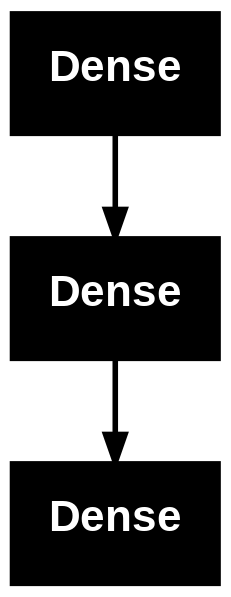

In [ ]:
plot_model(model)

<font color = cyan><font size = 6> Model Training

In [ ]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size) # X_train is our data. # Y_train is our data's associated labels. # nb_epoch and batch_size is defined at the very begining! Now you can experiment by changing nb_epoch and batch_size values.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.2656 - loss: 2.2005
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6831 - loss: 1.8020
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7645 - loss: 1.4422
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8053 - loss: 1.1479
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8262 - loss: 0.9441
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8433 - loss: 0.7977
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8536 - loss: 0.6961
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8582 - loss: 0.6374
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8685 - loss: 0.5797
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8704 - loss: 0.5419


<font color = Lime><font size = 6> Inference (অনুমান) on Test Data

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)  # evaluation is basically a list

# Display Test statistics
print("Summary : Loss over the Test Dataset : %.2f, Accuracy : %.2f" % (evaluation[0]*100, evaluation[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8698 - loss: 0.5564
Summary : Loss over the Test Dataset : 49.59, Accuracy : 88.48


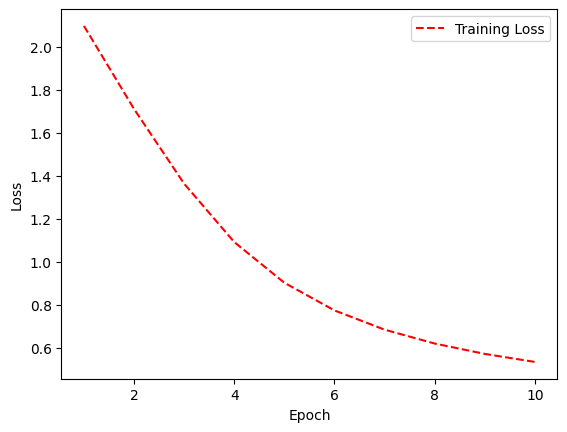

In [ ]:
# Get Training Loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

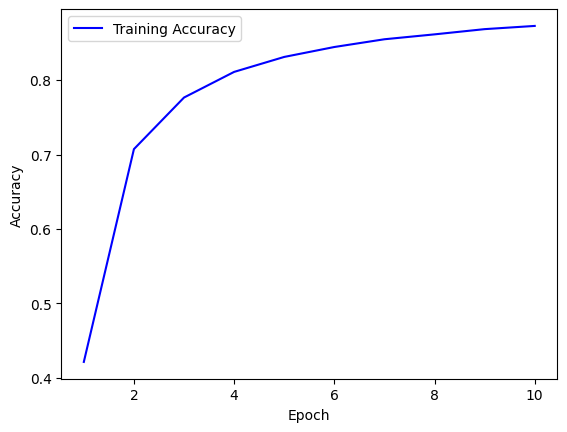

In [ ]:
# Get Training Accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Accuracy history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

<font size = 4><font color = cyan> We can see from epoch 6 onwards our accuracy has become saturated. Means accuracy is not increasing significantly. It is also noticeable from Loss graph. Loss is directly related to Accuracy. Now, how can we improve this saturacy (our accuracy)? One way could be by increasing the depth of our model (adding more layers). Another is, we can train it for more time (increse the number of epoch), Tune learing rate etc.